<a href="https://colab.research.google.com/github/nilanshutwinkle/Book-LLMs-from-scratch-code/blob/main/TIN_OCR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install colab-xterm ollama-ocr opencv-python ollama easyocr pytesseract --quiet #https://pypi.org/project/colab-xterm/
%load_ext colabxterm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.6/115.6 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 27.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 72.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 52.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 45.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2

In [ ]:
%xterm

Launching Xterm...

<IPython.core.display.Javascript object>

In [ ]:
from ollama_ocr import OCRProcessor

# Initialize OCR processor with the selected model
ocr = OCRProcessor(model_name='granite3.2-vision')  # You can choose other models

# Process an image or PDF file
result = ocr.process_image(
    image_path="/content/sample_data/tin_001.jpeg",  # Replace with your file path
    format_type="text",  # Options: markdown, text, json, structured, key_value
    custom_prompt="Extract only the text, focusing on dates and names.",  # Optional custom prompt
    language="English"  # Specify the language of the text
)

print(result)

Using custom prompt: Extract only the text, focusing on dates and names.

The image provided does not contain any discernible text or specific dates that can be clearly identified. It appears to be a stylized representation of a stadium with no readable content. If there are specific dates or names present in the image, they are not legible due to the resolution and quality of the image provided.


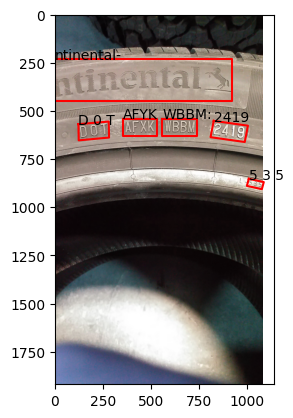

In [ ]:
import cv2
import easyocr
import matplotlib.pyplot as plt

# This needs to run only once to load the model into memory
reader = easyocr.Reader(['en'])

# reading the image
img = cv2.imread("/content/sample_data/tin_001.jpeg")

# run OCR
results = reader.readtext(img)

# show the image and plot the results
plt.imshow(img)
for res in results:
    # bbox coordinates of the detected text
    xy = res[0]
    xy1, xy2, xy3, xy4 = xy[0], xy[1], xy[2], xy[3]
    # text results and confidence of detection
    det, conf = res[1], res[2]
    # show time :)
    plt.plot([xy1[0], xy2[0], xy3[0], xy4[0], xy1[0]], [xy1[1], xy2[1], xy3[1], xy4[1], xy1[1]], 'r-')
    #plt.text(xy1[0], xy1[1], f'{det} [{round(conf, 2)}]')
    plt.text(xy1[0], xy1[1], f'{det}')

In [ ]:
# Image preprocessing function
def preprocess_image(image_path):
    # Load the image in grayscale
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Invert the image (black background, white text)
    img = cv2.bitwise_not(img)

    # Apply Gaussian blur to reduce noise
    img_blur = cv2.GaussianBlur(img, (5, 5), 0)

    # Use adaptive thresholding to improve contrast
    img_thresh = cv2.adaptiveThreshold(
        img_blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2
    )

    # Morphological operations to clean up the image (adjust kernel size if needed)
    kernel = np.ones((4, 4), np.uint8)
    img_morph = cv2.morphologyEx(img_thresh, cv2.MORPH_CLOSE, kernel)

    return img_morph

In [ ]:
import re

def extract_dot_number(ocr_text):
  """
  Extracts the tire DOT number from OCR text using a modified pattern.

  Args:
    ocr_text: The text output from OCR.

  Returns:
    The tire DOT number, or None if not found.
  """

  # Define a regular expression pattern for DOT numbers.
  # This pattern matches numbers like "215/60R17 964"
  # You might need to adjust it based on the specific variations in your data.
  dot_pattern = r"\b\d{3}/\d{2}R\d{2}\s*\d{2}\w*\b"

  # Find all matches of the pattern in the OCR text.
  matches = re.findall(dot_pattern, ocr_text)

  # If matches are found, return the first one.
  if matches:
    return matches[0]
  else:
    return None

# Example usage:
ocr_text = "This is a sample OCR text with a 215/60R17 964 number."
ocr_text = "This is a sample OCR text with a 215/60R17 96V number."
dot_number = extract_dot_number(ocr_text)
print(f"DOT Number: {dot_number}")

DOT Number: 215/60R17 96V


In [ ]:
def perspective_correction(image_path):
    # Perspective Correction (example)
    img = cv2.imread(image_path)
    rows, cols, ch = img.shape

    # Define source and destination points for perspective transformation
    pts1 = np.float32([[56, 65], [368, 52], [28, 387], [389, 390]])
    pts2 = np.float32([[0, 0], [300, 0], [0, 300], [300, 300]])

    # Calculate perspective transform matrix
    M = cv2.getPerspectiveTransform(pts1, pts2)

    # Apply perspective transformation
    dst = cv2.warpPerspective(img, M, (300, 300))

    # ... (continue with other preprocessing) ...

    return dst

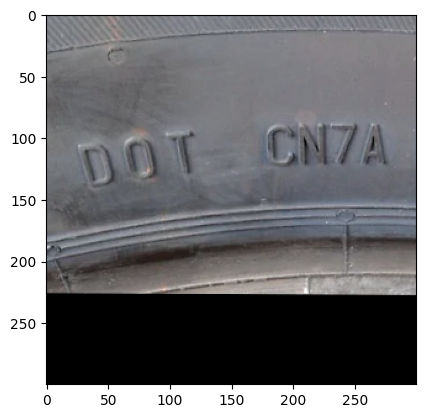

In [ ]:
plt.figure()
plt.imshow(perspective_correction(image_paths[0]))

In [ ]:
import cv2
import easyocr
import numpy as np

def segment_lines(image_path):
    """
    Segments lines of text from an image and keeps text order based on bounding box ordering.

    Args:
        image_path: Path to the image.

    Returns:
        A list of lines, where each line is a list of words in the correct order.
    """

    reader = easyocr.Reader(['en'])
    results = reader.readtext(image_path)

    lines = []
    current_line = []
    last_y = None

    # Sort bounding boxes by vertical position (y-coordinate)
    results.sort(key=lambda x: x[0][0][1])  # Sort by top-left y-coordinate

    for (bbox, text, prob) in results:
        # Get the top-left y-coordinate of the bounding box
        y = bbox[0][1]

        # Check if this bounding box belongs to a new line
        if last_y is not None and abs(y - last_y) > 15:  # Adjust threshold as needed
            lines.append(current_line)
            current_line = []

        # Add the word to the current line
        current_line.append(text)
        last_y = y

    # Add the last line
    lines.append(current_line)

    return lines

In [ ]:
lines = segment_lines(image_paths[0])

for line in lines:
    print(" ".join(line))  # Print each line of text

JU
D72Y CNZA (4019
D 0 T


Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

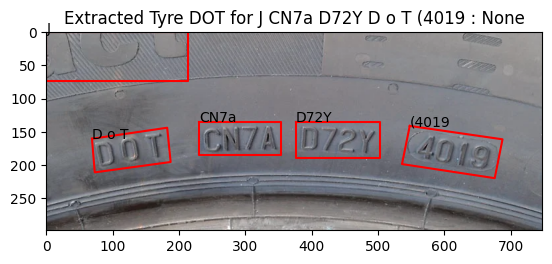

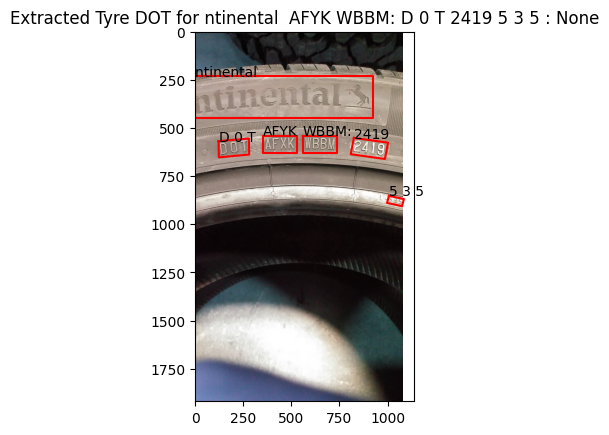

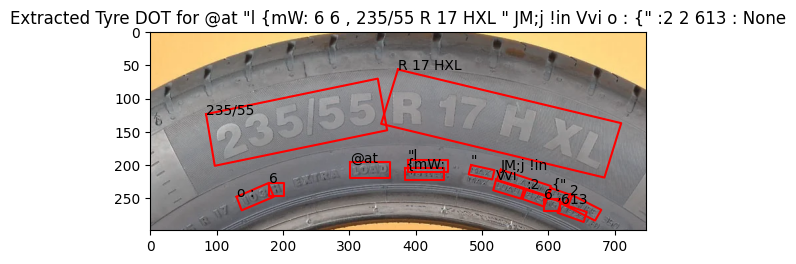

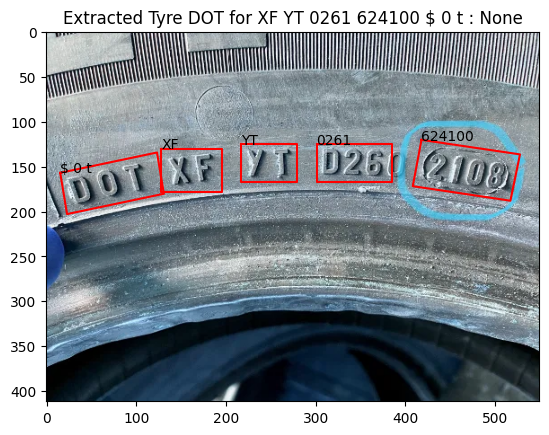

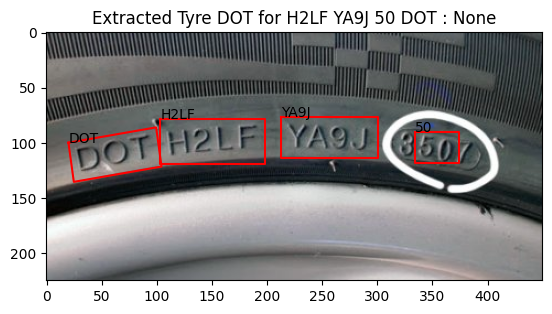

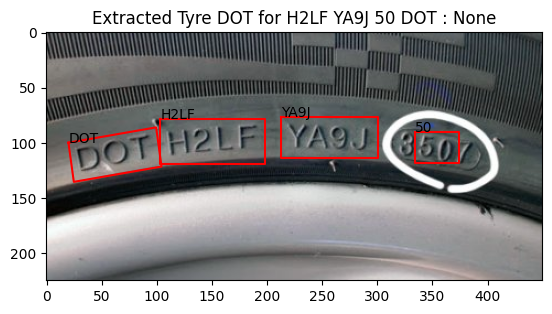

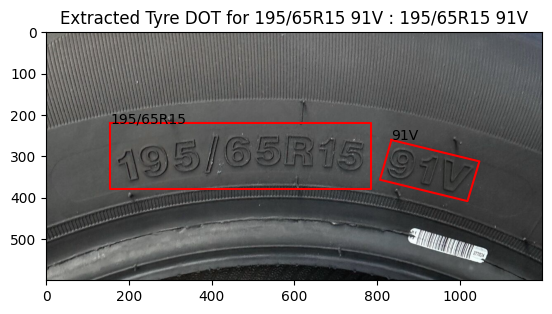

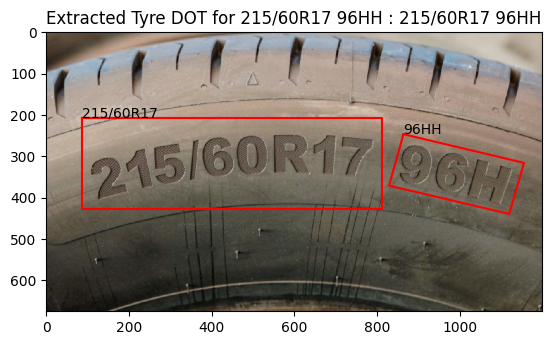

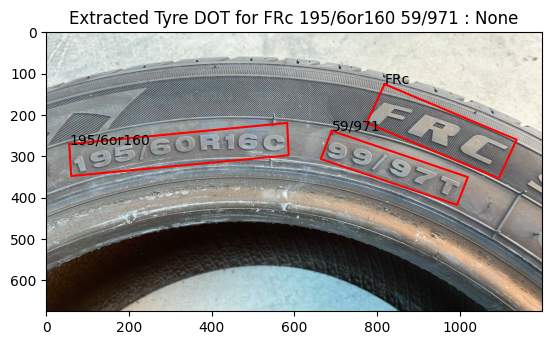

In [ ]:
import cv2
import easyocr
import matplotlib.pyplot as plt
import numpy as np

# Initialize EasyOCR reader
reader = easyocr.Reader(['en'])

# Image preprocessing function (same as before)
# def preprocess_image(image_path):
    # ... (your preprocessing code) ...

# Image paths (replace with your actual paths)
image_paths = ["/content/dot-serial.webp", "/content/tin_001.jpeg", "/content/tyre-doti-1.webp", "/content/tyre-doti-3.webp", "/content/tyre-doti-4.jpg", "/content/tyre-doti-5.jpg", "/content/tyre-doti-7.jpg", "/content/tyre-doti-8.jpg", "/content/tyre-doti-9.jpg"]
# image_paths = ["/content/dot-serial.webp"] #, "/content/tin_001.jpeg", "/content/tyre-doti-1.webp", "/content/tyre-doti-3.webp", "/content/tyre-doti-4.jpg", "/content/tyre-doti-5.jpg", "/content/tyre-doti-7.jpg", "/content/tyre-doti-8.jpg", "/content/tyre-doti-9.jpg"]

for image_path in image_paths:
    # Preprocess the image
    preprocessed_img = cv2.imread(image_path) #preprocess_image(image_path)

    # Perform OCR using EasyOCR
    results_easyocr = reader.readtext(preprocessed_img)

    # Display the image and EasyOCR results
    plt.figure()  # Create a new figure for each image
    plt.imshow(preprocessed_img, cmap='gray')
    ocr_text = ""
    for res in results_easyocr:
        xy = res[0]
        xy1, xy2, xy3, xy4 = xy[0], xy[1], xy[2], xy[3]
        det, conf = res[1], res[2]

        ocr_text += f"{det} "

        plt.plot([xy1[0], xy2[0], xy3[0], xy4[0], xy1[0]], [xy1[1], xy2[1], xy3[1], xy4[1], xy1[1]], 'r-')
        plt.text(xy1[0], xy1[1], f'{det}')
    # print("Extracted Tyre DOT: ", extract_dot_number(ocr_text))
    plt.title(f"Extracted Tyre DOT for {ocr_text}: {extract_dot_number(ocr_text)}")
    # plt.title(f"OCR Results for: {image_path}")
    plt.show()

In [ ]:
from ollama_ocr import OCRProcessor
import cv2
import easyocr
import matplotlib.pyplot as plt
import numpy as np
import tempfile

# Initialize OCR processor
ocr = OCRProcessor(model_name='granite3.2-vision')
reader = easyocr.Reader(['en'])

# Image preprocessing function (same as before)
# def preprocess_image(image_path):
    # ... (your preprocessing code) ...

# Image paths (replace with your actual paths)
image_paths = ["/content/dot-serial.webp", "/content/tin_001.jpeg", "/content/tyre-doti-1.webp", "/content/tyre-doti-3.webp", "/content/tyre-doti-4.jpg", "/content/tyre-doti-5.jpg", "/content/tyre-doti-7.jpg", "/content/tyre-doti-8.jpg", "/content/tyre-doti-9.jpg"]

for image_path in image_paths:
    # Preprocess the image
    preprocessed_img = preprocess_image(image_path)

    # Save preprocessed image to a temporary file
    with tempfile.NamedTemporaryFile(suffix=".png", delete=False) as temp_file:
        temp_file_path = temp_file.name
        cv2.imwrite(temp_file_path, preprocessed_img)

    # Perform OCR using Ollama OCR
    result_ollama = ocr.process_image(
        image_path=temp_file_path,
        format_type="json",
        custom_prompt="Extract only the text, focusing on dates and names.",
        language="English"
    )
    print("Ollama OCR Result:", result_ollama)

    # Perform OCR using EasyOCR
    results_easyocr = reader.readtext(preprocessed_img)

    # Display the image and EasyOCR results
    plt.figure()  # Create a new figure for each image
    plt.imshow(preprocessed_img, cmap='gray')
    for res in results_easyocr:
        xy = res[0]
        xy1, xy2, xy3, xy4 = xy[0], xy[1], xy[2], xy[3]
        det, conf = res[1], res[2]
        plt.plot([xy1[0], xy2[0], xy3[0], xy4[0], xy1[0]], [xy1[1], xy2[1], xy3[1], xy4[1], xy1[1]], 'r-')
        plt.text(xy1[0], xy1[1], f'{det}')
    plt.title(f"OCR Results for: {image_path}")
    plt.show()

Using custom prompt: Extract only the text, focusing on dates and names.

The text in the image is partially obscured and not entirely legible due to the quality of the image provided. However, from what can be discerned, there are two instances where text appears: "DOT" followed by a series of letters that could potentially be part of a name or code, and another set of characters that seem to be a date or numerical sequence. Without clearer visibility or additional context, it is not possible to accurately extract the full names or dates from this image.


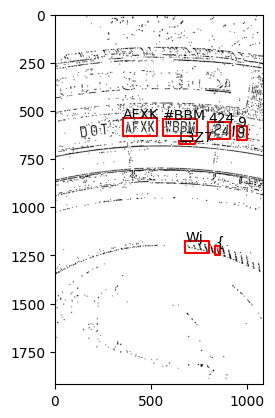

In [ ]:
# prompt: write to pre-process the image with opencv completely in order to perform successful ocr on the image which is having embossed black characters on the black background

from ollama_ocr import OCRProcessor
import cv2
import easyocr
import matplotlib.pyplot as plt
import numpy as np
import tempfile # import tempfile module

# Initialize OCR processor with the selected model
ocr = OCRProcessor(model_name='granite3.2-vision')  # You can choose other models

# Process an image or PDF file
image_path = "/content/sample_data/tin_001.jpeg"
preprocessed_img = preprocess_image(image_path)

# Save the preprocessed image to a temporary file
with tempfile.NamedTemporaryFile(suffix=".png", delete=False) as temp_file:
    temp_file_path = temp_file.name
    cv2.imwrite(temp_file_path, preprocessed_img)

# Pass the path of the temporary file to process_image
result = ocr.process_image(
    image_path=temp_file_path,  # Pass the temporary file path
    format_type="json",  # Options: markdown, text, json, structured, key_value
    custom_prompt="Extract only the text, focusing on dates and names.",  # Optional custom prompt
    language="English"  # Specify the language of the text
)

print(result)


# This needs to run only once to load the model into memory
reader = easyocr.Reader(['en'])

# reading the preprocessed image
img = preprocessed_img

# run OCR
results = reader.readtext(img)

# show the image and plot the results
plt.imshow(img, cmap='gray')  # Display grayscale image
for res in results:
    # bbox coordinates of the detected text
    xy = res[0]
    xy1, xy2, xy3, xy4 = xy[0], xy[1], xy[2], xy[3]
    # text results and confidence of detection
    det, conf = res[1], res[2]
    # show time :)
    plt.plot([xy1[0], xy2[0], xy3[0], xy4[0], xy1[0]], [xy1[1], xy2[1], xy3[1], xy4[1], xy1[1]], 'r-')
    plt.text(xy1[0], xy1[1], f'{det}')

plt.show()

In [ ]:
import base64
import io
from PIL import Image
import ollama

In [ ]:
def encode_image_to_base64(image_path: str, format: str = "PNG") -> str:
    """Encodes an image file to a base64 string.

    Args:
        image_path (str): Path to the image file.
        format (str): Format to save the image in memory (default is PNG).

    Returns:
        str: Base64-encoded image.
    """
    with Image.open(image_path) as img:
        buffered = io.BytesIO()
        img.save(buffered, format=format)
        return base64.b64encode(buffered.getvalue()).decode('utf-8')

In [ ]:
def get_ocr_output_from_image(image_base64: str, model: str = "granite3.2-vision") -> str:
    """Sends an image to the Llama OCR model and returns structured text output.

    Args:
        image_base64 (str): Base64-encoded image string.
        model (str): The model version to use for OCR (default is latest Llama 3.2 Vision).

    Returns:
        str: Extracted and structured text from the image.
    """
    response = ollama.chat(
        model=model,
        messages=[{
            "role": "user",
            "content": "The image is a tyre image. Identify the tire serial number which starts with DOT and ends in the manufacturing year.",
            "images": [image_base64]
        }]
    )
    return response.get('message', {}).get('content', '').strip()

In [ ]:
base64_image = encode_image_to_base64(image_path)
ocr_text = get_ocr_output_from_image(base64_image)
print(ocr_text)

To identify the tire serial number starting with "DOT" and ending in the manufacturing year, one would typically look for a unique alphanumeric code that is printed on the sidewall of the tire. This code usually includes the manufacturer's logo, model name, and the specific designation of the tire type (e.g., DOT for Department of Transportation). The manufacturing year is often indicated by a series of digits following the model number.

However, without the ability to view the image directly or access additional information about the tire's specifications, it is not possible to provide the exact serial number from this description alone. To obtain the specific details, one would need to refer to the vehicle's documentation or contact the manufacturer for the correct identification of the tire's serial number and manufacturing year.


## Image correction using Tessaract

https://medium.com/analytics-vidhya/build-your-own-optical-character-recognition-ocr-system-using-googles-tesseract-and-opencv-6bf40d2a6ae

In [ ]:
# prompt: command to download pytesseract in google collab
!sudo apt install tesseract-ocr

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 30 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 0s (22.1 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debco

In [ ]:
import pytesseract
# read image
im = cv2.imread("/content/tyre-doti-8.jpg")
# im = preprocess_image("/content/sample_data/tin_001.jpeg")
# configurations
config = ('-l eng --oem 3 --psm 1')
# pytessercat
text = pytesseract.image_to_string(im, config=config)
# print text
text = text.split('\n')
text

[' ', '', 'ee', '\x0c']

In [ ]:
# preprocessing
# gray scale
def gray(img):

    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # cv2.imwrite(r"./preprocess/img_gray.png",img)
    return img

# blur
def blur(img) :
    img_blur = cv2.GaussianBlur(img,(5,5),0)
    # cv2.imwrite(r"./preprocess/img_blur.png",img)
    return img_blur

# threshold
def threshold(img):
    #pixels with value below 100 are turned black (0) and those with higher value are turned white (255)
    img = cv2.threshold(img, 100, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY)[1]
    # cv2.imwrite(r"./preprocess/img_threshold.png",img)
    return img

In [ ]:
# Finding contours
im = cv2.imread("/content/sample_data/tin_001.jpeg")
im_gray = gray(im)
im_blur = blur(im_gray)
im_thresh = threshold(im_blur)

contours, _ = cv2.findContours(im_thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

In [ ]:
# text detection
from google.colab.patches import cv2_imshow

def contours_text(orig, img, contours):
    for cnt in contours:
        x, y, w, h = cv2.boundingRect(cnt)

        # Drawing a rectangle on copied image
        rect = cv2.rectangle(orig, (x, y), (x + w, y + h), (0, 255, 255), 2)

        # cv2.imshow('cnt',rect)
        cv2_imshow(rect)
        cv2.waitKey()

        # Cropping the text block for giving input to OCR
        cropped = orig[y:y + h, x:x + w]

        # Apply OCR on the cropped image
        config = ('-l eng --oem 1 --psm 3')
        text = pytesseract.image_to_string(cropped, config=config)

        print(text)

In [ ]:
# contours_text(im, "", contours)

## Image perspective correction using Hoffman technique

[Hough] Average angle detected: 4.10 degrees
[Tesseract OSD] Rotation detected: 0 degrees


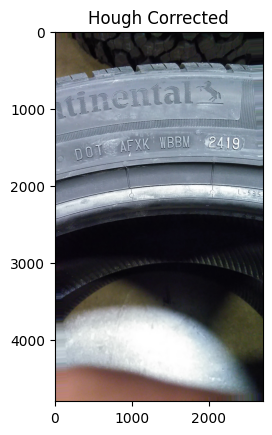

In [ ]:
import cv2
import numpy as np
import pytesseract
from pytesseract import Output
import math
from matplotlib import pyplot as plt

# Load image
image_path = "/content/tin_001.jpeg"
img = cv2.imread(image_path)

# Resize for visibility
img = cv2.resize(img, (0, 0), fx=2.5, fy=2.5)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# === Method 1: Hough Transform Skew Correction ===

# Edge detection
edges = cv2.Canny(gray, 50, 150, apertureSize=3)

# Hough Line Detection
lines = cv2.HoughLines(edges, 1, np.pi / 180, 100)

angles = []
if lines is not None:
    for rho, theta in lines[:, 0]:
        angle = (theta * 180 / np.pi) - 90
        if -45 < angle < 45:
            angles.append(angle)

# Compute average angle
avg_angle = np.mean(angles) if angles else 0

# Rotate to correct skew
(h, w) = gray.shape
center = (w // 2, h // 2)
M = cv2.getRotationMatrix2D(center, avg_angle, 1.0)
rotated_hough = cv2.warpAffine(img, M, (w, h), flags=cv2.INTER_LINEAR, borderMode=cv2.BORDER_REPLICATE)

# === Method 2: Tesseract OSD ===
osd_info = pytesseract.image_to_osd(img, output_type=Output.DICT)
osd_rotation = osd_info.get("rotate", 0)

# Rotate using Tesseract OSD
M_osd = cv2.getRotationMatrix2D(center, -osd_rotation, 1.0)
rotated_osd = cv2.warpAffine(img, M_osd, (w, h), flags=cv2.INTER_LINEAR, borderMode=cv2.BORDER_REPLICATE)

# === Display Results ===
print(f"[Hough] Average angle detected: {avg_angle:.2f} degrees")
print(f"[Tesseract OSD] Rotation detected: {osd_rotation} degrees")

# Save results
# cv2.imwrite("/mnt/data/hough_corrected.jpg", rotated_hough)
# cv2.imwrite("/mnt/data/osd_corrected.jpg", rotated_osd)

# Optionally show image (if running locally)
plt.imshow(cv2.cvtColor(rotated_hough, cv2.COLOR_BGR2RGB))
plt.title("Hough Corrected")
plt.show()

✅ Dominant angle used for correction: -45.00°


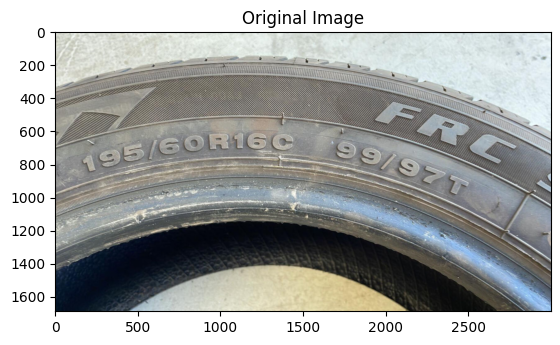

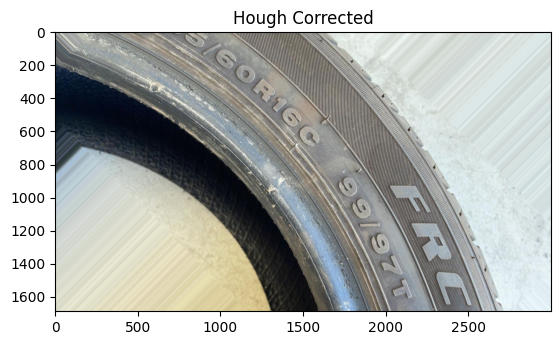

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import pytesseract
from pytesseract import Output

# Load and upscale image
image_path = "/content/tyre-doti-9.jpg"
img = cv2.imread(image_path)
img = cv2.resize(img, (0, 0), fx=2.5, fy=2.5)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Blur and threshold to enhance edges
blurred = cv2.GaussianBlur(gray, (3, 3), 0)
edges = cv2.Canny(blurred, 50, 150, apertureSize=3)

# Detect lines with Hough Transform
lines = cv2.HoughLines(edges, 1, np.pi / 180, 100)

angles = []
if lines is not None:
    for line in lines:
        rho, theta = line[0]
        angle = np.rad2deg(theta) - 90
        # Ignore near-vertical or near-horizontal lines
        if -60 < angle < 60:
            angles.append(angle)

# Use histogram to find the most common angle
if angles:
    hist, bins = np.histogram(angles, bins=90, range=(-45, 45))
    dominant_angle = bins[np.argmax(hist)]
else:
    dominant_angle = 0

# Rotate image using the dominant angle
(h, w) = gray.shape
center = (w // 2, h // 2)
M = cv2.getRotationMatrix2D(center, dominant_angle, 1.0)
rotated = cv2.warpAffine(img, M, (w, h), flags=cv2.INTER_LINEAR, borderMode=cv2.BORDER_REPLICATE)

# Save output
# cv2.imwrite("/mnt/data/rotated_corrected_dominant_angle.jpg", rotated)
print(f"✅ Dominant angle used for correction: {dominant_angle:.2f}°")

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.show()

plt.imshow(cv2.cvtColor(rotated, cv2.COLOR_BGR2RGB))
plt.title("Hough Corrected")
plt.show()

## Perspective correction with Manual Homography

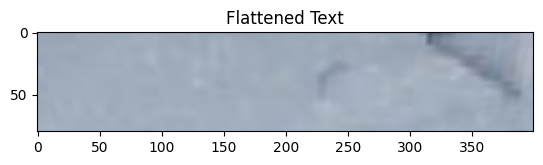

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load and upscale image
image_path = "/content/tyre-doti-8.jpg"
img = cv2.imread(image_path)
img = cv2.resize(img, (0, 0), fx=2.5, fy=2.5)
orig = img.copy()

# Step 1: Manually define 4 points around the DOT text (order: top-left, top-right, bottom-right, bottom-left)
# You can get these using cv2.selectROI or hardcode based on visual check
# Example dummy points (you should update based on actual image)
pts_src = np.array([[320, 380], [580, 370], [590, 430], [310, 440]], dtype='float32')

# Step 2: Define the desired output rectangle size
width, height = 400, 80
pts_dst = np.array([[0, 0], [width - 1, 0], [width - 1, height - 1], [0, height - 1]], dtype='float32')

# Step 3: Compute Homography
H, status = cv2.findHomography(pts_src, pts_dst)

# Step 4: Warp perspective
warped = cv2.warpPerspective(orig, H, (width, height))

# Save and show
# cv2.imwrite("/mnt/data/unwarped_tire_text.jpg", warped)
plt.imshow(cv2.cvtColor(warped, cv2.COLOR_BGR2RGB))
plt.title("Flattened Text")
plt.show()

## Homography Orb Correction

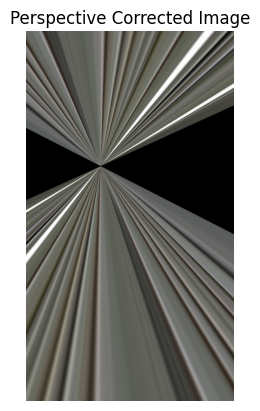

In [ ]:
# Homography using ORB Feature Matching to correct perspective
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load both the distorted (input) and reference (flat) images
input_path = "/content/tyre-doti-5.jpg"
reference_path = "/content/tin_001.jpeg"  # You must upload this image

img1 = cv2.imread(input_path, cv2.IMREAD_COLOR)  # Input image
img2 = cv2.imread(reference_path, cv2.IMREAD_COLOR)  # Reference (flat text)

# Resize if needed for processing
img1 = cv2.resize(img1, (0, 0), fx=2.0, fy=2.0)
img2 = cv2.resize(img2, (0, 0), fx=2.0, fy=2.0)

# Convert to grayscale
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# Detect ORB keypoints and descriptors
orb = cv2.ORB_create(nfeatures=1000)
kp1, des1 = orb.detectAndCompute(gray1, None)
kp2, des2 = orb.detectAndCompute(gray2, None)

# Match features using BFMatcher
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(des1, des2)
matches = sorted(matches, key=lambda x: x.distance)

# Draw top 50 matches for visualization (optional)
matched_vis = cv2.drawMatches(img1, kp1, img2, kp2, matches[:50], None, flags=2)
cv2.imwrite("/mnt/data/matched_keypoints.jpg", matched_vis)

# Extract location of good matches
pts1 = np.float32([kp1[m.queryIdx].pt for m in matches[:50]]).reshape(-1, 1, 2)
pts2 = np.float32([kp2[m.trainIdx].pt for m in matches[:50]]).reshape(-1, 1, 2)

# Compute Homography
H, mask = cv2.findHomography(pts1, pts2, cv2.RANSAC, 5.0)

# Warp the original image to align with reference
height, width = img2.shape[:2]
aligned_img = cv2.warpPerspective(img1, H, (width, height))

# Save and show result
# cv2.imwrite("/mnt/data/unwarped_orb_result.jpg", aligned_img)
plt.imshow(cv2.cvtColor(aligned_img, cv2.COLOR_BGR2RGB))
plt.title("Perspective Corrected Image")
plt.axis('off')
plt.show()

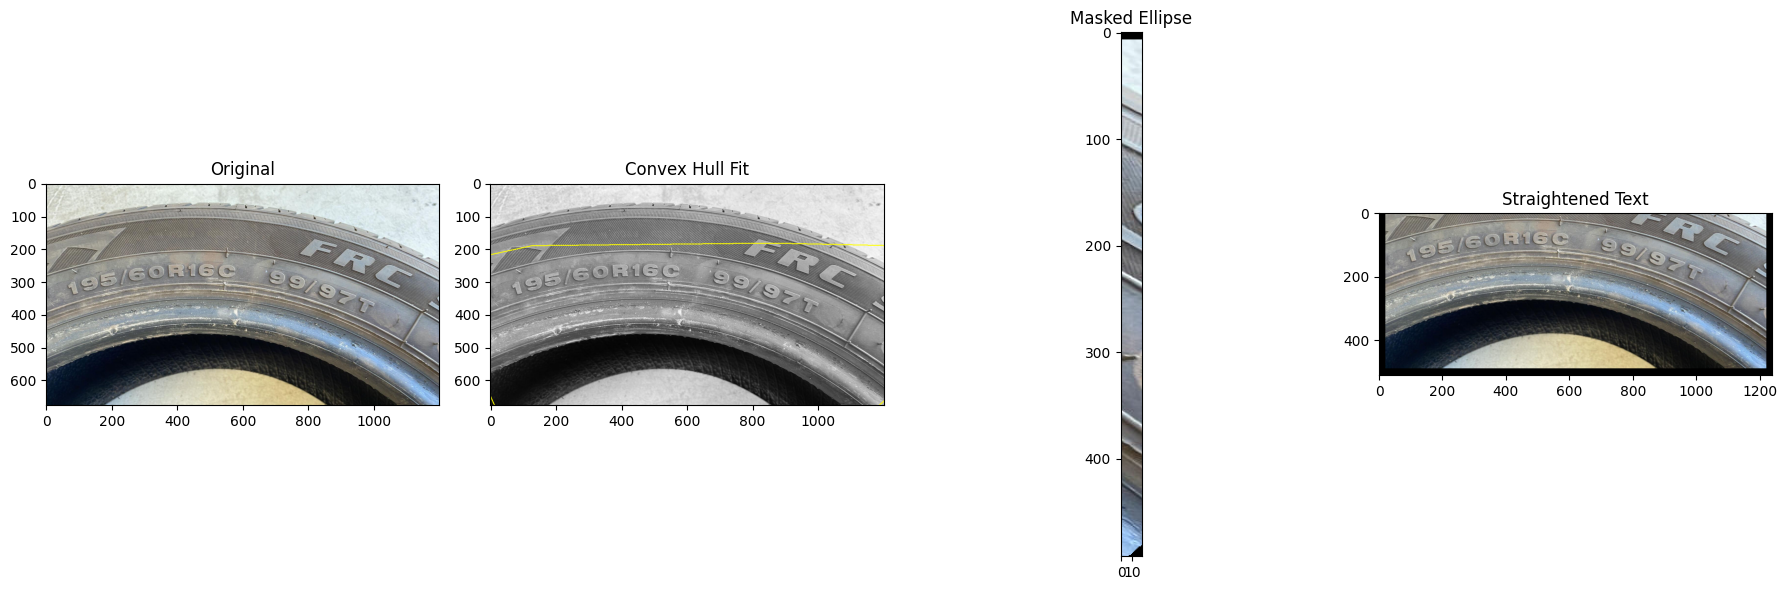

DOT Detected:  None


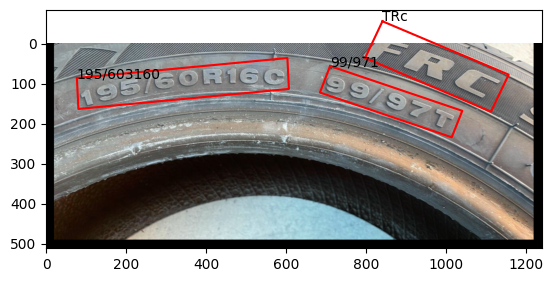

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pytesseract

# === Step 1: Load and Preprocess Image ===
image = cv2.imread('/content/tyre-doti-9.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

h, w = gray.shape
blur = cv2.GaussianBlur(gray, (5, 5), 0)
thresh = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                                 cv2.THRESH_BINARY_INV, 15, 10)

# === Step 2: Detect Contours and Find Curved Text Arc ===
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
debug_image = cv2.cvtColor(gray, cv2.COLOR_GRAY2BGR)

bounding_boxes = []
for contour in contours:
    if len(contour) >= 5:
        x, y, w_c, h_c = cv2.boundingRect(contour)
        area = cv2.contourArea(contour)
        if y > h * 0.3 and y < h * 0.9 and h_c > 10 and area > 50:
            bounding_boxes.append((x, y, x+w_c, y+h_c))

if not bounding_boxes:
    raise ValueError("No bounding boxes found for potential text regions.")

bounding_boxes = np.array(bounding_boxes)

# === Step 3: Create Convex Hull of Bounding Boxes with Buffer ===
buffer = 20  # Increased buffer to ensure text is not cut off
points = []
for x1, y1, x2, y2 in bounding_boxes:
    points.extend([
        [x1 - buffer, y1 - buffer],
        [x1 - buffer, y2 + buffer],
        [x2 + buffer, y1 - buffer],
        [x2 + buffer, y2 + buffer]
    ])
points = np.array(points, dtype=np.int32)

# Fit a convex hull
hull = cv2.convexHull(points)

# Create mask and apply to image
mask = np.zeros_like(gray)
cv2.fillConvexPoly(mask, hull, 255)
masked = cv2.bitwise_and(image, image, mask=mask)

# Find bounding boxes that fall inside the convex hull mask
covered_boxes = []
for box in bounding_boxes:
    x1, y1, x2, y2 = box
    center_x = (x1 + x2) // 2
    center_y = (y1 + y2) // 2
    if mask[center_y, center_x] > 0:
        covered_boxes.append(box)

if not covered_boxes:
    raise ValueError("No text boxes found inside the convex hull mask.")

covered_boxes = np.array(covered_boxes)
sorted_boxes = sorted(covered_boxes, key=lambda box: box[0])
start_box = sorted_boxes[0]
end_box = sorted_boxes[-1]

# Calculate min/max Y and ensure all covered boxes are included
min_y = min(box[1] for box in covered_boxes) - buffer
max_y = max(box[3] for box in covered_boxes) + buffer
start_x = start_box[0] - buffer
end_x = end_box[2] + buffer

# Define source and destination points for perspective transform
src_pts = np.array([
    [start_x, min_y],
    [end_x, min_y],
    [start_x, max_y],
    [end_x, max_y]
], dtype=np.float32)

dst_width = end_x - start_x
dst_height = max_y - min_y

dst_pts = np.array([
    [0, 0],
    [dst_width - 1, 0],
    [0, dst_height - 1],
    [dst_width - 1, dst_height - 1]
], dtype=np.float32)

M = cv2.getPerspectiveTransform(src_pts, dst_pts)
warped = cv2.warpPerspective(image, M, (dst_width, dst_height))

# === Step 4: Visualize Results ===
plt.figure(figsize=(18, 6))
plt.subplot(141)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original")

plt.subplot(142)
debug_hull = debug_image.copy()
cv2.polylines(debug_hull, [hull], isClosed=True, color=(0, 255, 255), thickness=2)
plt.imshow(cv2.cvtColor(debug_hull, cv2.COLOR_BGR2RGB))
plt.title("Convex Hull Fit")

plt.subplot(143)
x_e, y_e, w_e, h_e = cv2.boundingRect(hull)
roi = masked[y_e:y_e+h_e, x_e:x_e+w_e]
plt.imshow(cv2.cvtColor(roi, cv2.COLOR_BGR2RGB))
plt.title("Masked Ellipse")

plt.subplot(144)
plt.imshow(cv2.cvtColor(warped, cv2.COLOR_BGR2RGB))
plt.title("Straightened Text")
plt.tight_layout()
plt.show()

# === Step 5: OCR ===
# text = pytesseract.image_to_string(warped)
# print("OCR Result:", text)


# === Step 5: OCR ===
reader = easyocr.Reader(['en'])
# run OCR
results = reader.readtext(warped)
results.sort(key=lambda x: x[0][0][0])
# print("OCR Result:", results)
# show the image and plot the results
plt.imshow(warped)

ocr_text = ""
for res in results:
    # bbox coordinates of the detected text
    xy = res[0]
    xy1, xy2, xy3, xy4 = xy[0], xy[1], xy[2], xy[3]
    # text results and confidence of detection
    det, conf = res[1], res[2]
    ocr_text += f"{det} "
    # show time :)
    plt.plot([xy1[0], xy2[0], xy3[0], xy4[0], xy1[0]], [xy1[1], xy2[1], xy3[1], xy4[1], xy1[1]], 'r-')
    #plt.text(xy1[0], xy1[1], f'{det} [{round(conf, 2)}]')
    plt.text(xy1[0], xy1[1], f'{det}')

print("DOT Detected: ", extract_dot_number(ocr_text))

### Fitting the mask based on text arc

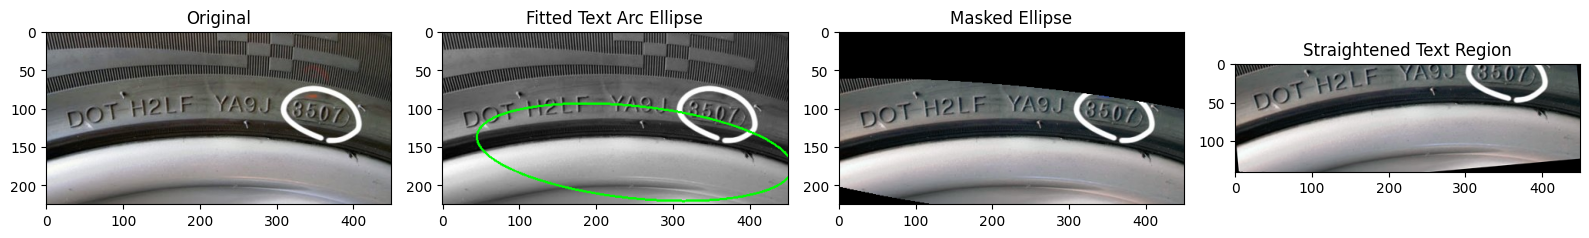

OCR Result: 


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# === Step 1: Load and Preprocess Image ===
image = cv2.imread('/content/tyre-doti-5.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

h, w = gray.shape
blur = cv2.GaussianBlur(gray, (5, 5), 0)
thresh = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                                 cv2.THRESH_BINARY_INV, 15, 10)

# === Step 2: Detect Contours and Find Curved Text Arc ===
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
debug_image = cv2.cvtColor(gray, cv2.COLOR_GRAY2BGR)

bounding_boxes = []
for contour in contours:
    if len(contour) >= 5:
        x, y, w_c, h_c = cv2.boundingRect(contour)
        area = cv2.contourArea(contour)
        if y > h * 0.3 and y < h * 0.9 and h_c > 10 and area > 50:
            bounding_boxes.append((x, y, x+w_c, y+h_c))

if not bounding_boxes:
    raise ValueError("No bounding boxes found for potential text regions.")

# Merge nearby boxes
bounding_boxes = np.array(bounding_boxes)
x_min, y_min = np.min(bounding_boxes[:, [0,1]], axis=0)
x_max, y_max = np.max(bounding_boxes[:, [2,3]], axis=0)

# Fit ellipse to all centers of bounding boxes
box_centers = np.array([[(x1+x2)//2, (y1+y2)//2] for x1, y1, x2, y2 in bounding_boxes])
if len(box_centers) < 5:
    raise ValueError("Not enough centers to fit an ellipse.")
ellipse = cv2.fitEllipse(box_centers)
cv2.ellipse(debug_image, ellipse, (0, 255, 0), 2)

# Define mask from ellipse, expanded to capture text arc
center = (int(ellipse[0][0]), int(ellipse[0][1]))
axes = (int(ellipse[1][0]*1.4), int(ellipse[1][1]*2.2))  # exaggerate size for coverage
angle = ellipse[2]

mask = np.zeros_like(gray)
cv2.ellipse(mask, (center, axes, angle), 255, -1)
masked = cv2.bitwise_and(image, image, mask=mask)

# === Step 4: Warp to straighten text line ===
# Determine angle from first and last bounding box
start_x, start_y = min(box_centers, key=lambda p: p[0])
end_x, end_y = max(box_centers, key=lambda p: p[0])
angle_radians = np.arctan2(end_y - start_y, end_x - start_x)
angle_degrees = np.degrees(angle_radians)

# Rotate image to align text line
rotation_matrix = cv2.getRotationMatrix2D(center, angle_degrees, 1.0)
rotated = cv2.warpAffine(masked, rotation_matrix, (w, h), flags=cv2.INTER_CUBIC)

# Crop bounding region
cropped = rotated[y_min:y_max, x_min:x_max]

# === Step 5: Show Results ===
plt.figure(figsize=(16, 6))
plt.subplot(141)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original")

plt.subplot(142)
plt.imshow(debug_image)
plt.title("Fitted Text Arc Ellipse")

plt.subplot(143)
plt.imshow(masked, cmap='gray')
plt.title("Masked Ellipse")

plt.subplot(144)
plt.imshow(cropped, cmap='gray')
plt.title("Straightened Text Region")
plt.tight_layout()
plt.show()

# === Step 6: OCR (Optional) ===
# This needs to run only once to load the model into memory
reader = easyocr.Reader(['en'])
# run OCR
results = reader.readtext(img)
print("OCR Result:", results)

## Performing OCR with ASTER and MORAN
[Medium Article](https://eng-mhasan.medium.com/ocr-with-deep-learning-in-pytorch-b8a481c604fc)

In [ ]:
!sudo apt install cmake libcupti-dev
!pip install protobuf tqdm numpy editdistance pybind11 --quiet

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
cmake is already the newest version (3.22.1-1ubuntu1.22.04.2).
The following additional packages will be installed:
  libcupti-doc libcupti11.5 node-html5shiv
Suggested packages:
  nodejs
The following NEW packages will be installed:
  libcupti-dev libcupti-doc libcupti11.5 node-html5shiv
0 upgraded, 4 newly installed, 0 to remove and 30 not upgraded.
Need to get 18.0 MB of archives.
After this operation, 89.0 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/multiverse amd64 libcupti11.5 amd64 11.5.114~11.5.1-1ubuntu1 [7,696 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 node-html5shiv all 3.7.3+dfsg-4 [13.6 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/multiverse amd64 libcupti-dev amd64 11.5.114~11.5.1-1ubuntu1 [7,915 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/multiverse amd64 libcupti-doc all 11.5.114~11.5.1-1ubuntu1 [2,373 

## Image correction with EAST Text Detection

In [ ]:
!wget https://raw.githubusercontent.com/oyyd/frozen_east_text_detection.pb/master/frozen_east_text_detection.pb

--2025-04-07 03:05:47--  https://raw.githubusercontent.com/oyyd/frozen_east_text_detection.pb/master/frozen_east_text_detection.pb
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 96662756 (92M) [application/octet-stream]
Saving to: ‘frozen_east_text_detection.pb’

frozen_east_text_de 100%[===================>]  92.18M   246MB/s    in 0.4s    

2025-04-07 03:05:48 (246 MB/s) - ‘frozen_east_text_detection.pb’ saved [96662756/96662756]



0.7808740139007568


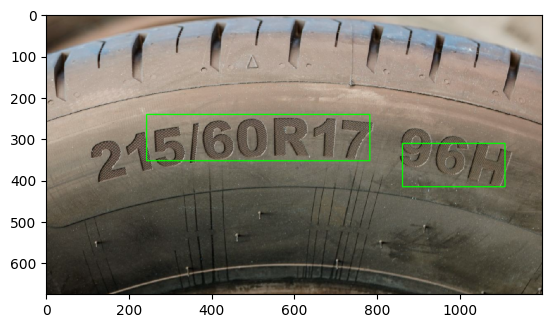

In [ ]:
import os, sys
import numpy as np
import cv2
import time
from imutils.object_detection import non_max_suppression
from matplotlib import pyplot as plt

def east_detect(image):
    layerNames = [
    	"feature_fusion/Conv_7/Sigmoid",
    	"feature_fusion/concat_3"]

    orig = image.copy()

    if len(image.shape) == 2:
        image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)

    (H, W) = image.shape[:2]

    # set the new width and height and then determine the ratio in change
    # for both the width and height: Should be multiple of 32
    (newW, newH) = (320, 320)

    rW = W / float(newW)
    rH = H / float(newH)

    # resize the image and grab the new image dimensions
    image = cv2.resize(image, (newW, newH))

    (H, W) = image.shape[:2]

    net = cv2.dnn.readNet("frozen_east_text_detection.pb")

    blob = cv2.dnn.blobFromImage(image, 1.0, (W, H),
    	(123.68, 116.78, 103.94), swapRB=True, crop=False)

    start = time.time()

    net.setInput(blob)

    (scores, geometry) = net.forward(layerNames)

    (numRows, numCols) = scores.shape[2:4]
    rects = []
    confidences = []
    # loop over the number of rows
    for y in range(0, numRows):
        # extract the scores (probabilities), followed by the geometrical
        # data used to derive potential bounding box coordinates that
        # surround text
        scoresData = scores[0, 0, y]
        xData0 = geometry[0, 0, y]
        xData1 = geometry[0, 1, y]
        xData2 = geometry[0, 2, y]
        xData3 = geometry[0, 3, y]
        anglesData = geometry[0, 4, y]

        for x in range(0, numCols):
    		# if our score does not have sufficient probability, ignore it
            # Set minimum confidence as required
            if scoresData[x] < 0.5:
                continue
    		# compute the offset factor as our resulting feature maps will
            #  x smaller than the input image
            (offsetX, offsetY) = (x * 4.0, y * 4.0)
            # extract the rotation angle for the prediction and then
            # compute the sin and cosine
            angle = anglesData[x]
            cos = np.cos(angle)
            sin = np.sin(angle)
            # use the geometry volume to derive the width and height of
            # the bounding box
            h = xData0[x] + xData2[x]
            w = xData1[x] + xData3[x]
            # compute both the starting and ending (x, y)-coordinates for
            # the text prediction bounding box
            endX = int(offsetX + (cos * xData1[x]) + (sin * xData2[x]))
            endY = int(offsetY - (sin * xData1[x]) + (cos * xData2[x]))
            startX = int(endX - w)
            startY = int(endY - h)
            # add the bounding box coordinates and probability score to
            # our respective lists
            rects.append((startX, startY, endX, endY))
            confidences.append(scoresData[x])

    boxes = non_max_suppression(np.array(rects), probs=confidences)
    # loop over the bounding boxes
    for (startX, startY, endX, endY) in boxes:
    	# scale the bounding box coordinates based on the respective
    	# ratios
    	startX = int(startX * rW)
    	startY = int(startY * rH)
    	endX = int(endX * rW)
    	endY = int(endY * rH)
    	# draw the bounding box on the image
    	cv2.rectangle(orig, (startX, startY), (endX, endY), (0, 255, 0), 2)


    print(time.time() - start)
    return orig

image = cv2.imread("/content/tyre-doti-8.jpg")

out_image = east_detect(image)

plt.figure()
plt.imshow(out_image) #, cmap='gray')
plt.show()

# cv2.imwrite("sample_output.jpg", out_image)

## Implementing CRAFTs for text detection

In [ ]:
!pip install basenet --quiet

  Preparing metadata (setup.py) ... done


In [ ]:
import sys
import os
import importlib

# Check if the 'basenet' module is in the path
if 'basenet' not in sys.path:
    sys.path.append(os.path.abspath('/usr/local/lib/python3.10/dist-packages/basenet/')) # add path of 'basenet' to the system path

importlib.reload(sys.modules['basenet'])

<module 'basenet' from '/usr/local/lib/python3.11/dist-packages/basenet/__init__.py'>

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

from torchvision.models import vgg16_bn
# from torchvision.models._utils import IntermediateLayerGetter

class double_conv(nn.Module):
    def __init__(self, in_ch, mid_ch, out_ch):
        super(double_conv, self).__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(in_ch + mid_ch, mid_ch, kernel_size=1),
            nn.BatchNorm2d(mid_ch),
            nn.ReLU(inplace=True),
            nn.Conv2d(mid_ch, out_ch, kernel_size=3, padding=1),
            nn.BatchNorm2d(out_ch),
            nn.ReLU(inplace=True)
        )

    def forward(self, x):
        x = self.conv(x)
        return x


class CRAFT(nn.Module):
    def __init__(self, pretrained=False, freeze=False):
        super(CRAFT, self).__init__()

        """ Base network """
        self.basenet = vgg16_bn(pretrained, freeze)

        """ U network """
        self.upconv1 = double_conv(1024, 512, 256)
        self.upconv2 = double_conv(512, 256, 128)
        self.upconv3 = double_conv(256, 128, 64)
        self.upconv4 = double_conv(128, 64, 32)

        num_class = 2
        self.conv_cls = nn.Sequential(
            nn.Conv2d(32, 32, kernel_size=3, padding=1), nn.ReLU(inplace=True),
            nn.Conv2d(32, 32, kernel_size=3, padding=1), nn.ReLU(inplace=True),
            nn.Conv2d(32, 16, kernel_size=3, padding=1), nn.ReLU(inplace=True),
            nn.Conv2d(16, 16, kernel_size=1), nn.ReLU(inplace=True),
            nn.Conv2d(16, num_class, kernel_size=1),
        )

        init_weights(self.upconv1.modules())
        init_weights(self.upconv2.modules())
        init_weights(self.upconv3.modules())
        init_weights(self.upconv4.modules())
        init_weights(self.conv_cls.modules())

    def forward(self, x):
        """ Base network """
        sources = self.basenet(x)

        """ U network """
        y = torch.cat([sources[0], sources[1]], dim=1)
        y = self.upconv1(y)

        y = F.interpolate(y, size=sources[2].size()[2:], mode='bilinear', align_corners=False)
        y = torch.cat([y, sources[2]], dim=1)
        y = self.upconv2(y)

        y = F.interpolate(y, size=sources[3].size()[2:], mode='bilinear', align_corners=False)
        y = torch.cat([y, sources[3]], dim=1)
        y = self.upconv3(y)

        y = F.interpolate(y, size=sources[4].size()[2:], mode='bilinear', align_corners=False)
        y = torch.cat([y, sources[4]], dim=1)
        feature = self.upconv4(y)

        y = self.conv_cls(feature)

        return y.permute(0,2,3,1), feature

ImportError: cannot import name 'vgg16_bn' from 'basenet.basenet' (/usr/local/lib/python3.11/dist-packages/basenet/basenet.py)

In [ ]:
cuda = False # set to True for GPU

# load net
net = CRAFT()

# Load the weights from pre-trained model
if cuda:
    net.load_state_dict(copyStateDict(torch.load(args.trained_model)))

else:
    net.load_state_dict(copyStateDict(torch.load(args.trained_model, map_location='cpu')))

# set to eval mode
net.eval()

In [ ]:
import numpy as np
from skimage import io
import cv2

def loadImage(img_file):
    img = io.imread(img_file)           # RGB order
    if img.shape[0] == 2: img = img[0]
    if len(img.shape) == 2 : img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
    if img.shape[2] == 4:   img = img[:,:,:3]
    img = np.array(img)

    return img

def normalizeMeanVariance(in_img, mean=(0.485, 0.456, 0.406), variance=(0.229, 0.224, 0.225)):
    # should be RGB order
    img = in_img.copy().astype(np.float32)

    img -= np.array([mean[0] * 255.0, mean[1] * 255.0, mean[2] * 255.0], dtype=np.float32)
    img /= np.array([variance[0] * 255.0, variance[1] * 255.0, variance[2] * 255.0], dtype=np.float32)
    return img

def resize_aspect_ratio(img, square_size, interpolation, mag_ratio=1):
    height, width, channel = img.shape

    # magnify image size
    target_size = mag_ratio * max(height, width)

    # set original image size
    if target_size > square_size:
        target_size = square_size

    ratio = target_size / max(height, width)

    target_h, target_w = int(height * ratio), int(width * ratio)
    proc = cv2.resize(img, (target_w, target_h), interpolation = interpolation)


    # make canvas and paste image
    target_h32, target_w32 = target_h, target_w
    if target_h % 32 != 0:
        target_h32 = target_h + (32 - target_h % 32)
    if target_w % 32 != 0:
        target_w32 = target_w + (32 - target_w % 32)
    resized = np.zeros((target_h32, target_w32, channel), dtype=np.float32)
    resized[0:target_h, 0:target_w, :] = proc
    target_h, target_w = target_h32, target_w32

    size_heatmap = (int(target_w/2), int(target_h/2))

    return resized, ratio, size_heatmap


# Load the image
image = imgproc.loadImage(image_path)

# Resize the image
img_resized, target_ratio, size_heatmap = resize_aspect_ratio(image, args.canvas_size, interpolation=cv2.INTER_LINEAR, mag_ratio=args.mag_ratio)
ratio_h = ratio_w = 1 / target_ratio

# Normalize the image
x = normalizeMeanVariance(img_resized)

In [ ]:
# Load image as torch tensor
x = torch.from_numpy(x).permute(2, 0, 1)    # [h, w, c] to [c, h, w]
x = Variable(x.unsqueeze(0))                # [c, h, w] to [b, c, h, w]

if cuda:
    x = x.cuda()

# forward pass
with torch.no_grad():
    y, feature = net(x)

# Get Score and Affinity Map
score_text = y[0,:,:,0].cpu().data.numpy()
score_link = y[0,:,:,1].cpu().data.numpy()